Cost of health insurance solution

In [33]:
# Empezamos haciendo un EDA

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
# eliminamos duplicados 

total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [36]:
total_data.shape

(1337, 7)

Hacemos un EDA de todo el dataframe ya que es pequeño y nos puede aportar gran importancia

In [37]:
import pandas as pd

num_columnas = total_data.shape[1]

nombres_columnas = total_data.columns.tolist()

print("El DataFrame total_data tiene {} columnas:".format(num_columnas))
print(nombres_columnas)

El DataFrame total_data tiene 7 columnas:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [38]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Análisis sobre variables categóricas

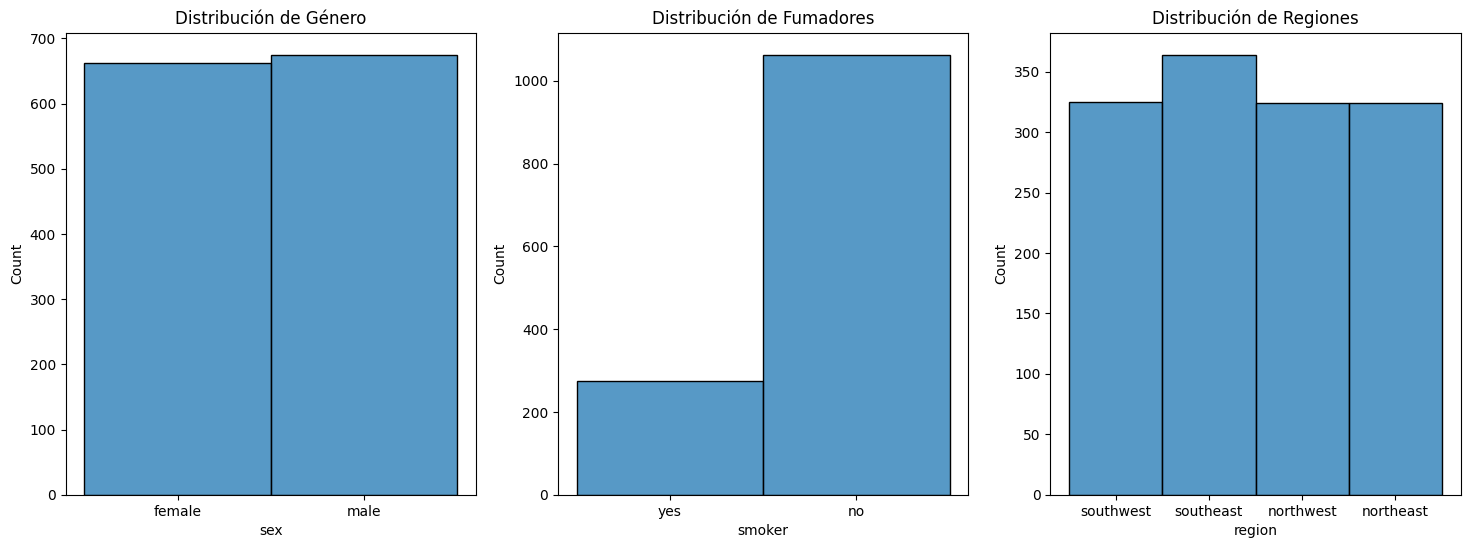

In [39]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Histograma para la variable 'sex'
plt.subplot(1, 3, 1)
sns.histplot(data=total_data, x='sex', discrete=True)
plt.title('Distribución de Género')

# Histograma para la variable 'smoker'
plt.subplot(1, 3, 2)
sns.histplot(data=total_data, x='smoker', discrete=True)
plt.title('Distribución de Fumadores')

# Histograma para la variable 'region'
plt.subplot(1, 3, 3)
sns.histplot(data=total_data, x='region', discrete=True)
plt.title('Distribución de Regiones')


plt.show()

Análisis sobre variables numéricas

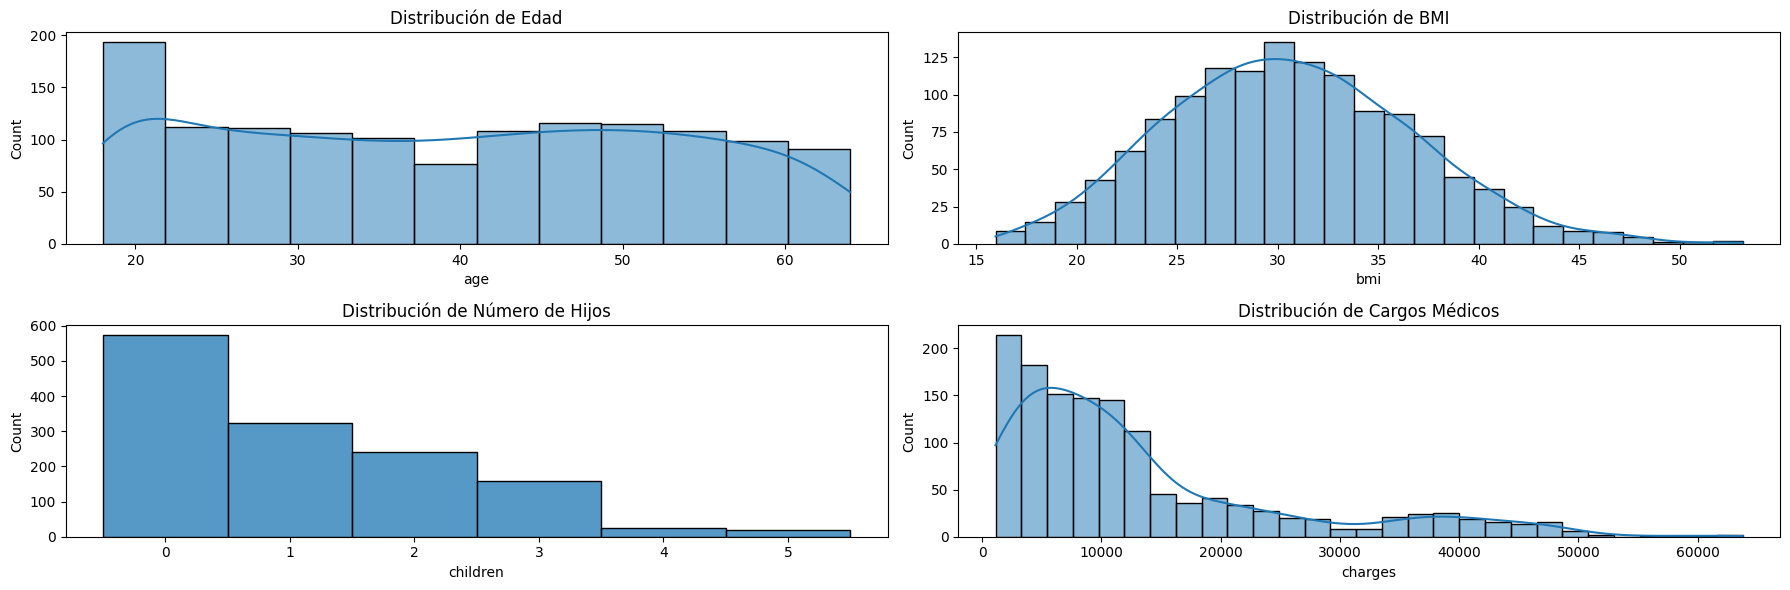

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 6))

# Histograma para la variable 'age'
plt.subplot(2, 2, 1)
sns.histplot(data=total_data, x='age', kde=True)
plt.title('Distribución de Edad')

# Histograma para la variable 'bmi'
plt.subplot(2, 2, 2)
sns.histplot(data=total_data, x='bmi', kde=True)
plt.title('Distribución de BMI')

# Histograma para la variable 'children'
plt.subplot(2, 2, 3)
sns.histplot(data=total_data, x='children', discrete=True)
plt.title('Distribución de Número de Hijos')

# Histograma para la variable 'charges'
plt.subplot(2, 2, 4)
sns.histplot(data=total_data, x='charges', kde=True)
plt.title('Distribución de Cargos Médicos')


plt.tight_layout()


plt.show()

Análisis de variables multivariante

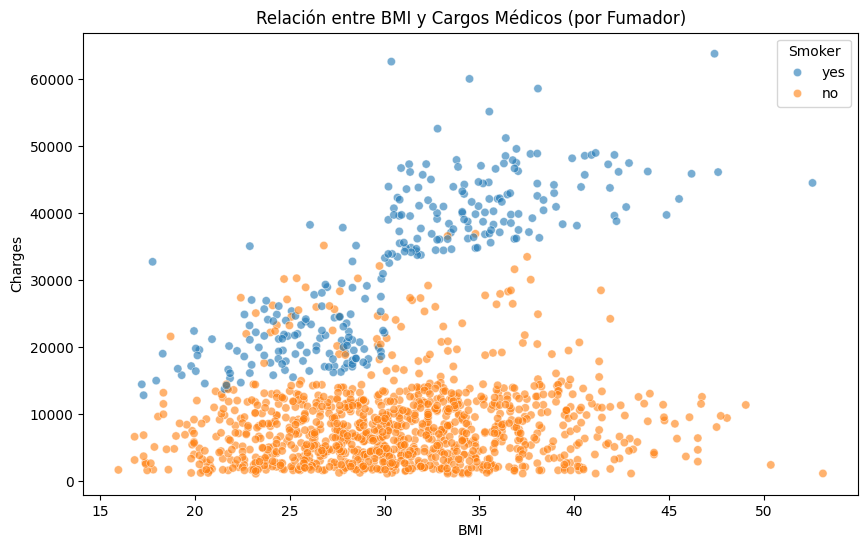

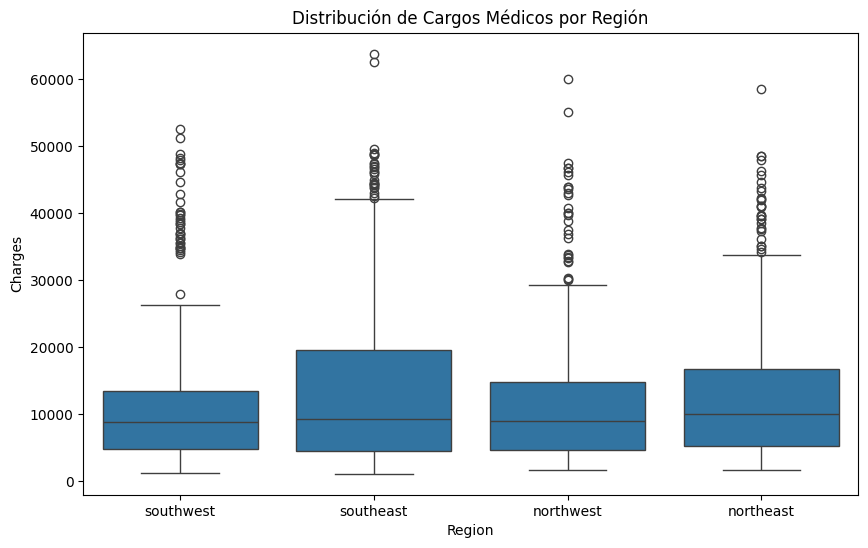

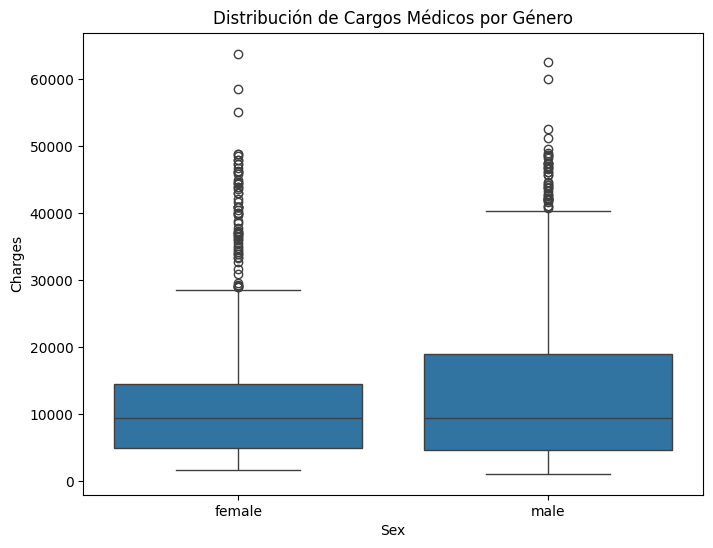

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión condicional (hue) de 'charges' y 'bmi' condicionado por 'smoker'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_data, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('Relación entre BMI y Cargos Médicos (por Fumador)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

# Diagrama de caja (boxplot) de 'charges' para cada valor de 'region'
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_data, x='region', y='charges')
plt.title('Distribución de Cargos Médicos por Región')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Diagrama de caja (boxplot) de 'charges' para cada valor de 'sex'
plt.figure(figsize=(8, 6))
sns.boxplot(data=total_data, x='sex', y='charges')
plt.title('Distribución de Cargos Médicos por Género')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

Podemos observas que hay un mayor gasto medico por fumadores que por BMI , tambien podemos observas que los gastos medicos en Southeast son mayores. Y por ultimo los hombres suponen un gasto mayor que las mujeres.

Estos tres graficos nos definen muy bien todas las caracteristicas exenciales para los gatos.

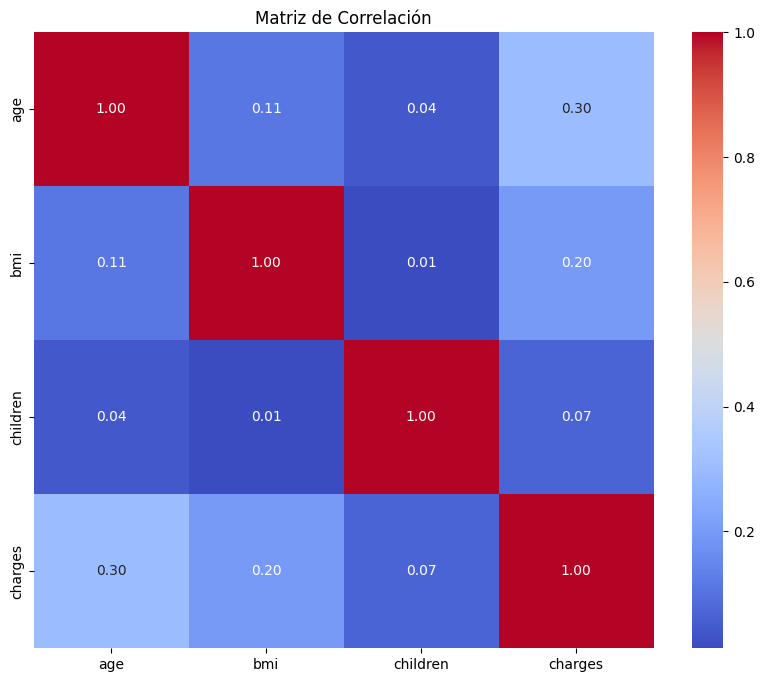

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas del DataFrame, ya que la matriz de correlacion solo puede calcular la correlacoin entre variables numericas
numeric_columns = total_data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que los gastos no tienen mucha relacion con los niños , pero si aumenta con variable BMI y es mayor con la edad

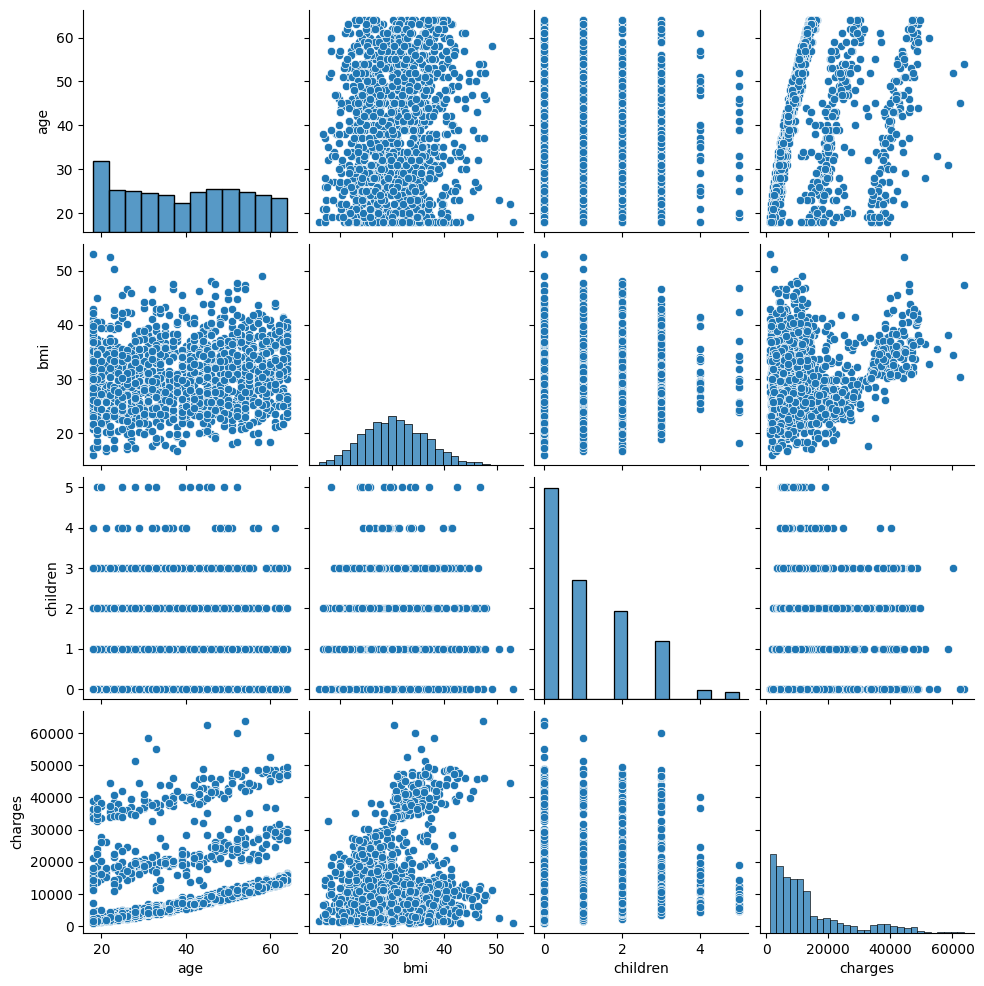

In [43]:
sns.pairplot(data = total_data)

Análisis de outliers

In [44]:
total_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
import pandas as pd


# Obtener el número de columnas
num_columnas = total_data.shape[1]

# Obtener los nombres de las columnas
nombres_columnas = total_data.columns.tolist()

print("El DataFrame total_data tiene {} columnas:".format(num_columnas))
print(nombres_columnas)

El DataFrame total_data tiene 7 columnas:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


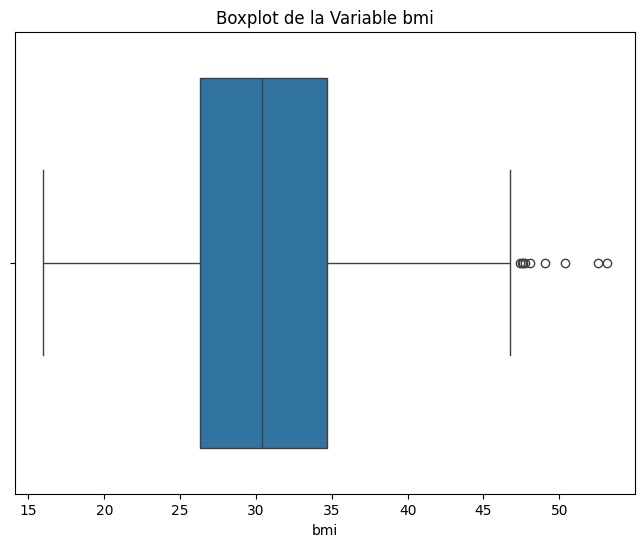

Número de filas eliminadas debido a outliers en la variable bmi: 9
Los límites superior e inferior para encontrar valores atípicos son 47.32 y 13.67, con un rango intercuartílico de 8.41


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar la variable 'bmi'
variable = 'bmi'

# Crear un boxplot para visualizar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=total_data[variable])
plt.title('Boxplot de la Variable {}'.format(variable))
plt.xlabel(variable)
plt.show()

# Calcular el rango intercuartílico (IQR)
Q1 = total_data[variable].quantile(0.25)
Q3 = total_data[variable].quantile(0.75)
price_iqr = Q3 - Q1

# Calcular los límites para identificar los outliers
lower_limit = Q1 - 1.5 * price_iqr
upper_limit = Q3 + 1.5 * price_iqr

# Este código calculará los límites superior e inferior utilizando el rango intercuartílico (IQR) y luego filtrará los datos para mantener 
# solo las observaciones de BMI dentro de este rango. La variable filtered_data contendrá únicamente las filas que no 
# contienen outliers en la variable BMI

filtered_data = total_data[(total_data[variable] >= lower_limit) & (total_data[variable] <= upper_limit)]

# Mostrar la cantidad de filas eliminadas
outliers_removed = len(total_data) - len(filtered_data)
print("Número de filas eliminadas debido a outliers en la variable {}: {}".format(variable, outliers_removed))

# Imprimir los límites y el rango intercuartílico
print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Número de filas eliminadas debido a outliers en la variable age: 0


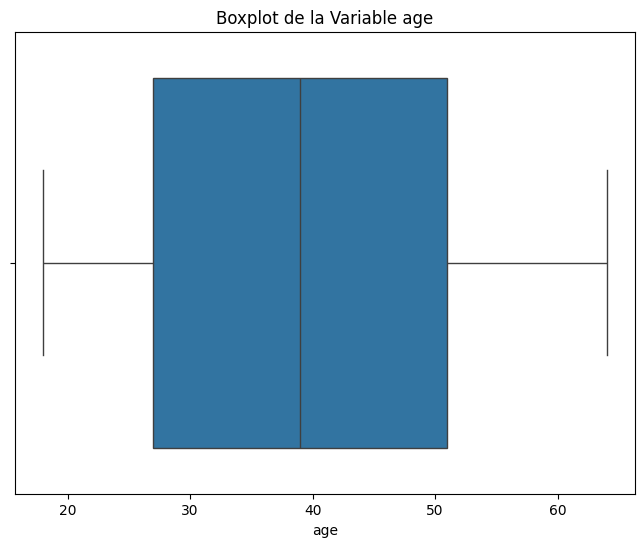

Los límites superior e inferior para encontrar outliers son 87.0 y -9.0, con un rango intercuartílico de 24.0


In [47]:
variable = 'age'

# Calcular el rango intercuartílico (IQR)
Q1 = total_data[variable].quantile(0.25)
Q3 = total_data[variable].quantile(0.75)
age_iqr = Q3 - Q1

# Calcular los límites para identificar los outliers
lower_limit = Q1 - 1.5 * age_iqr
upper_limit = Q3 + 1.5 * age_iqr

# Filtrar los datos para mantener solo las observaciones dentro del rango
filtered_data_age = total_data[(total_data[variable] >= lower_limit) & (total_data[variable] <= upper_limit)]

# Mostrar la cantidad de filas eliminadas
outliers_removed_age = len(total_data) - len(filtered_data_age)
print("Número de filas eliminadas debido a outliers en la variable {}: {}".format(variable, outliers_removed_age))

# Crear un boxplot para visualizar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=total_data[variable])
plt.title('Boxplot de la Variable {}'.format(variable))
plt.xlabel(variable)
plt.show()

# Imprimir los límites y el rango intercuartílico
print(f"Los límites superior e inferior para encontrar outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Número de filas eliminadas debido a outliers en la variable children: 0


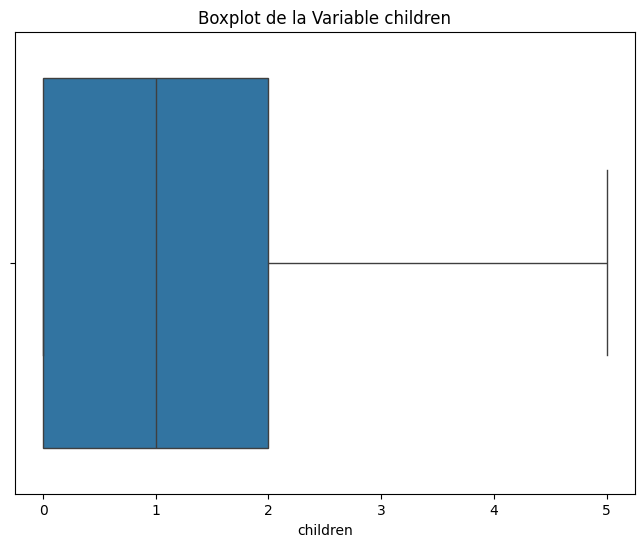

Los límites superior e inferior para encontrar outliers son 5.0 y -3.0, con un rango intercuartílico de 2.0


In [48]:
variable = 'children'

# Calcular el rango intercuartílico (IQR)
Q1 = total_data[variable].quantile(0.25)
Q3 = total_data[variable].quantile(0.75)
children_iqr = Q3 - Q1

# Calcular los límites para identificar los outliers
lower_limit = Q1 - 1.5 * children_iqr
upper_limit = Q3 + 1.5 * children_iqr

# Filtrar los datos para mantener solo las observaciones dentro del rango
filtered_data_children = total_data[(total_data[variable] >= lower_limit) & (total_data[variable] <= upper_limit)]

# Mostrar la cantidad de filas eliminadas
outliers_removed_children = len(total_data) - len(filtered_data_children)
print("Número de filas eliminadas debido a outliers en la variable {}: {}".format(variable, outliers_removed_children))

# Crear un boxplot para visualizar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=total_data[variable])
plt.title('Boxplot de la Variable {}'.format(variable))
plt.xlabel(variable)
plt.show()

# Imprimir los límites y el rango intercuartílico
print(f"Los límites superior e inferior para encontrar outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(children_iqr, 2)}")

Para poder proceder al entrenamiento del moledo normalizamos los datos 

In [49]:
from sklearn.preprocessing import MinMaxScaler

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


Hacemos el entrenamiento del modelo y la divicion de Test y Train. Podemos hacer un seleckbest del 40% y podemos ver como solo deja las columnas que nos hace falta y las de mas importancia como son age, bmi , children y smoker_n

Mas adelante veremos un grafica donde veremos como se comportan las variables selecionadas con la variable objetivo 

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
# División del conjunto de datos:
X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Selección de características: Se utiliza SelectKBest junto con el método f_regression para seleccionar las mejores características 
# basadas en la relación con la variable objetivo (charges). El parámetro k se establece en 4, lo que significa que se seleccionarán 
# las 4 mejores características.

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

# Identificación de columnas seleccionadas: Se obtienen las columnas seleccionadas utilizando el método get_support() 
# y se almacenan en selected_columns.

selected_columns = X_train.columns[selection_model.get_support()]

# Transformación de conjuntos de entrenamiento y prueba
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

# Visualización de las primeras filas del conjunto de entrenamiento seleccionado
X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [51]:
# Visualizacion de X_test

X_test_sel.head()

,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [52]:
# Guardamos 

X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [53]:
# Empezamos con el modelo de Regresion Lineal.

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


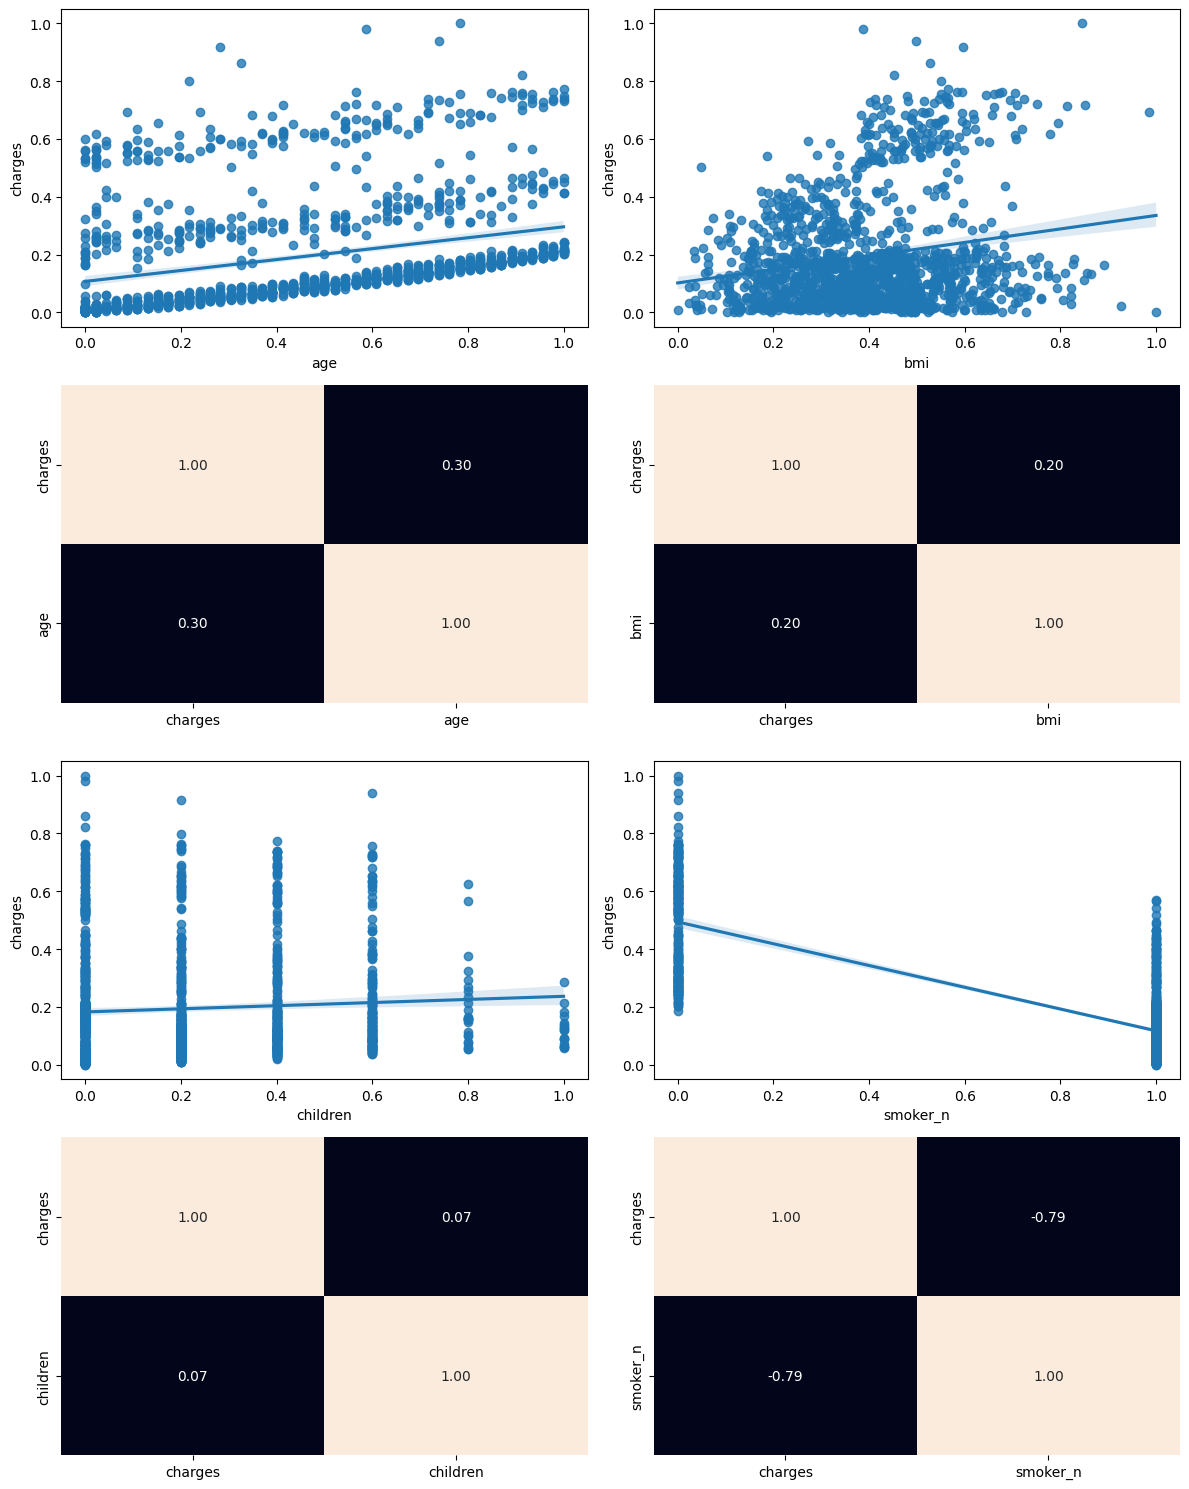

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (12, 15))
total_data = pd.concat([train_data, test_data])

# Graficar para la característica 'age'
sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Graficar para la característica 'bmi'
sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Graficar para la característica 'children'
sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

# Graficar para la característica 'smoker_n'
sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

# Este código realiza un análisis visual de la relación entre varias características (age, bmi, children, smoker_n) 
# y la variable objetivo (charges) en un conjunto de datos que combina datos de entrenamiento (train_data) y datos de prueba (test_data).

In [55]:
# Eliminamos nuestra variable Y ( charges ) de la variable X. Ya que nuestro objetivo es la variable charges

X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [56]:
# Hacemos el modelo de Regresion Lineal 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Después del proceso de entrenamiento podemos conocer los parámetros (variables a y b) que ha ajustado el modelo:

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1,b2 ,b3 ,b4): {model.coef_}")

# Tendrías b1​ para 'age', b2​ para 'bmi', b3​ para 'children', y b4​ para 'smoker_n'. La cantidad total de variables b es igual 
# al número de variables independientes en tu modelo.

Intercepto (a): 0.3195827183308946
Coeficientes (b1,b2 ,b3 ,b4): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [58]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")


Error cuadrático medio: 0.009150574110332004
Coeficiente de determinación: 0.8045531086669286


Un modelo de Regresión Lineal no tiene hiperparámetros que optimizar. Debemos utilizar otro modelo para realizar mejoras como un modelo regularizado